# # Task 1: EDA on Processed Review

In [13]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Root directory (one level up from notebook)
root_dir = os.path.dirname(os.getcwd())
src_path = os.path.join(root_dir, "src")

# Add src to sys.path to access components and core
if src_path not in sys.path:
    sys.path.append(src_path)

# Now imports will work
from components.preprocessor import ReviewPreprocessor
from components.scraper import main as run_scraper
from core.configLoader import config_loader


In [14]:
# Run scraper to get raw review DataFrame
print("Running scraper...")
df_raw = run_scraper()  # returns a DataFrame
print(f"Scraped {len(df_raw)} reviews")
df_raw.head()


Running scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
Current Rating: 4.3201356, Total Ratings: 38877, Total Reviews: 8339

BOA: Bank of Abyssinia
Current Rating: 4.173709, Total Ratings: 6375, Total Reviews: 1222

Dashen: Dashen Bank
Current Rating: 4.1525426, Total Ratings: 3919, Total Reviews: 781
App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|                                                                                                                                      | 0/3 [00:00<?, ?it/s]


Scraping 400 reviews for com.combanketh.mobilebanking...
Successfully scraped 400 reviews
Collected 400 reviews for Commercial Bank of Ethiopia


Banks:  33%|██████████████████████████████████████████                                                                                    | 1/3 [00:03<00:07,  3.98s/it]


Scraping 400 reviews for com.boa.boaMobileBanking...
Successfully scraped 400 reviews
Collected 400 reviews for Bank of Abyssinia


Banks:  67%|████████████████████████████████████████████████████████████████████████████████████                                          | 2/3 [00:08<00:04,  4.32s/it]


Scraping 400 reviews for com.dashen.dashensuperapp...
Successfully scraped 400 reviews
Collected 400 reviews for Dashen Bank


Banks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.20s/it]


Total reviews collected: 1200
  Commercial Bank of Ethiopia: 400 reviews
  Bank of Abyssinia: 400 reviews
  Dashen Bank: 400 reviews
Data saved to: data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: good...
Date: 2025-11-30 16:24:48

Rating: ⭐⭐⭐⭐⭐
Review: CBE ይለያል።...
Date: 2025-11-29 17:22:32

Rating: ⭐⭐⭐⭐⭐
Review: it's special for me...
Date: 2025-11-29 15:54:14

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: 🙏👍...
Date: 2025-11-29 03:47:54

Rating: ⭐⭐⭐⭐⭐
Review: Very Good...
Date: 2025-11-28 20:18:20

Rating: ⭐⭐⭐⭐⭐
Review: goof...
Date: 2025-11-28 13:33:37

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: very smart App easy to use and friendly...
Date: 2025-11-29 16:22:04

Rating: ⭐⭐⭐⭐⭐
Review: Very exemplery App to other Bank Aps !...
Date: 2025-11-29 02:45:26

Rating: ⭐⭐⭐⭐⭐


,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_version,source
0,361ac925-5bd6-4455-8efe-95394a4ba679,good,5,2025-11-30 16:24:48,Mahamed Abdireshid,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29 17:22:32,Kamil Tesfaye,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 15:54:14,Abde Semed,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


In [15]:
df_raw.shape

(1200, 11)

In [18]:
# run_preprocessing.py
import pandas as pd
from src.components.preprocessor import ReviewPreprocessor  # your class

def run(df: pd.DataFrame = None):
    """
    Run preprocessing either on a provided DataFrame or from CSV paths in config.
    Returns processed DataFrame.
    """
    preprocessor = ReviewPreprocessor()

    if df is not None:
        # Use the provided DataFrame instead of reading CSV
        preprocessor.df = df
        preprocessor.stats['original_count'] = len(df)
        print(f"Processing passed DataFrame with {len(df)} rows")

        preprocessor.handle_missing_values()
        preprocessor.normalize_dates()
        preprocessor.clean_text()
        preprocessor.validate_ratings()
        preprocessor.prepare_final_output()
        return preprocessor.df
    else:
        # Process CSV file using paths from YAML config
        return preprocessor.process()


if __name__ == "__main__":
    # Run preprocessing from CSV in config
    df_processed = run()
    print(df_processed.head())


Loaded 1200 reviews from data/raw/reviews_raw.csv
Removed 0 rows with missing critical values
Processed data saved to data/processed/reviews_processed.csv
                              review_id review_text  rating review_date  \
0  3463230e-f9f7-4be3-a632-fdd8d017ce84          🙏👍       5  2025-11-29   
1  a6cbfa34-f2b1-4a16-96b6-c94f58cea76f   Very Good       5  2025-11-28   
2  fc67d12c-92e2-45aa-a9e0-011f58a583bc        goof       5  2025-11-28   
3  11306fb9-5571-4950-8d32-604c5402242f       good!       5  2025-11-28   
4  809c46d2-730e-446a-9061-2a45e978ad9d    good jop       5  2025-11-27   

   review_year  review_month bank_code          bank_name  \
0         2025            11       BOA  Bank of Abyssinia   
1         2025            11       BOA  Bank of Abyssinia   
2         2025            11       BOA  Bank of Abyssinia   
3         2025            11       BOA  Bank of Abyssinia   
4         2025            11       BOA  Bank of Abyssinia   

             user_name  thu

/tmp/ipykernel_82920/1944416722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_processed, palette='viridis')
/tmp/ipykernel_82920/1944416722.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df_processed, palette='Set2')


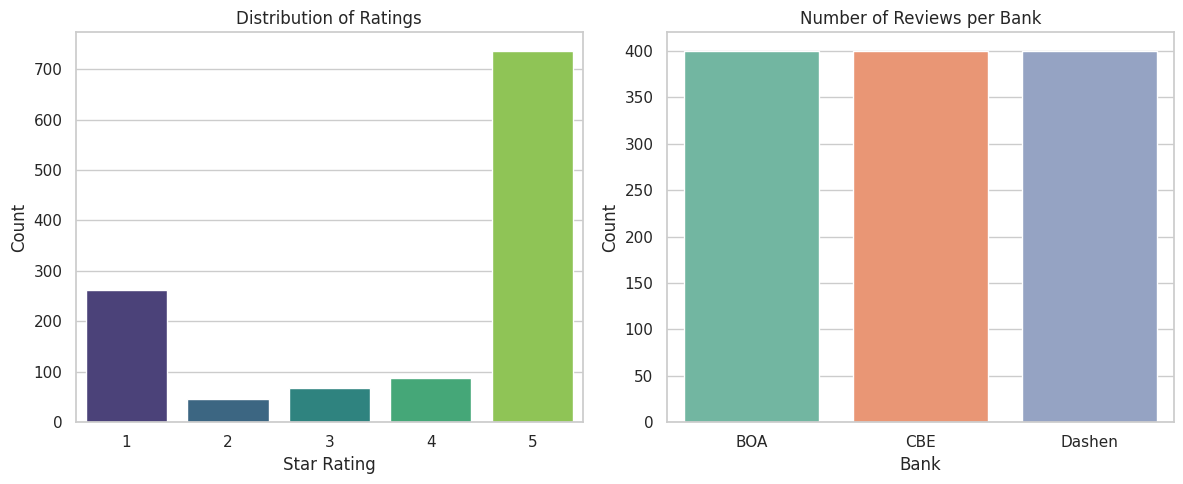

In [20]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df_processed, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df_processed, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

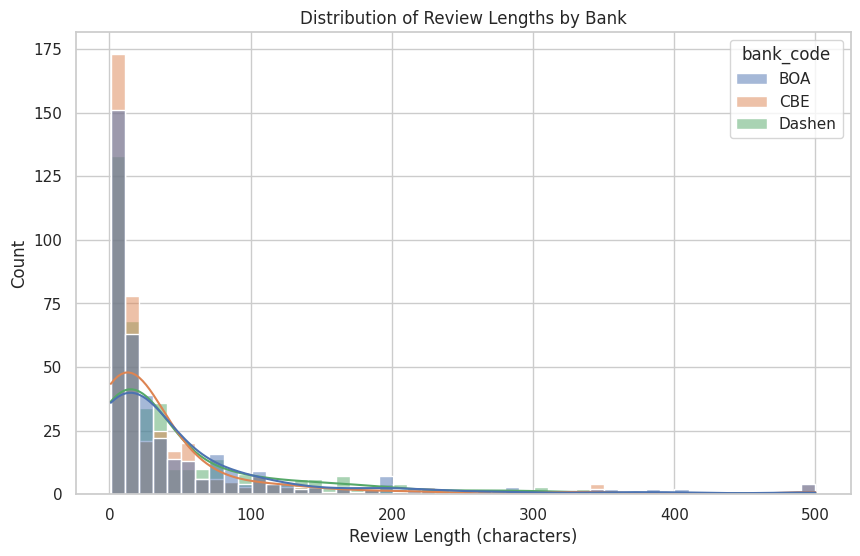

In [21]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_processed, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()